In [1]:
from frozen_lake import get_frozen_lake
from models import run_policy_iteration, run_value_iteration, run_qlearning

import hiive.mdptoolbox.example as example

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

from frozen_lake import get_frozen_lake
from models import run_policy_iteration, run_value_iteration, run_qlearning

import hiive.mdptoolbox.example as example

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colors = ["red", "blue", "green", "black", "gray", "orange", "purple"]

big_lake = {}
big_lake["P"], big_lake["R"], big_lake["map"] = get_frozen_lake(n=30, frozen_p=0.9)

small_lake = {}
small_lake["P"], small_lake["R"], small_lake["map"] = get_frozen_lake(n=8, frozen_p=0.9)

In [3]:
%matplotlib inline

In [5]:
iter_avgs = []
n = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
for i in n:
    print(i)
    iters = []
    for j in range(10):
        P, R, map= get_frozen_lake(n=30, frozen_p=0.9)
        vi_df, vi = run_value_iteration(P, R,  gamma=0.6, epsilon = i)
        iters.append(vi.iter)
    iter_avgs.append(np.mean(iters))

1e-07
1e-06
1e-05
0.0001
0.001
0.01


Text(0, 0.5, 'Average Iterations to Converge')

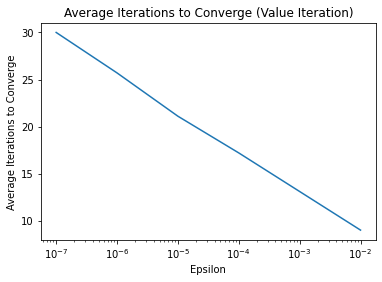

In [8]:
plt.semilogx(n, iter_avgs)
plt.title("Average Iterations to Converge (Value Iteration)")
plt.xlabel("Epsilon")
plt.ylabel("Average Iterations to Converge")

In [31]:
P, R = example.forest(S=10)

In [32]:
pi_df, pi = run_policy_iteration(P,R)

In [33]:
pi_df

,State,Action,Reward,Error,Time,V[0],Max V,Mean V,Iteration
0,None,None,23.172342,14.144819,0.003727,4.475046,23.172342,6.786765,1
1,None,None,23.172342,10.904819,0.007611,4.475046,23.172342,8.201246,2
2,None,None,23.172342,8.280419,0.008410,4.475046,23.172342,9.291727,3
3,None,None,23.172342,6.154655,0.009183,4.475046,23.172342,10.119768,4
4,None,None,23.172342,4.432786,0.009881,4.475046,23.172342,10.735232,5
5,None,None,23.172342,3.038072,0.010555,4.475046,23.172342,11.178510,6
6,None,None,23.172342,1.908354,0.011220,4.475046,23.172342,11.482316,7
7,None,None,23.172342,0.993282,0.012049,4.475046,23.172342,11.673151,8
8,None,None,23.896436,0.000009,0.013175,6.003691,23.896436,12.577027,9


In [34]:
vi_df, vi = run_value_iteration(P,R)

In [35]:
vi_df

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration
0,None,None,4.000000,4.000000,0.000381,4.000000,1.200000,1
1,None,None,7.240000,3.240000,0.000493,7.240000,1.829000,2
2,None,None,9.937300,2.697300,0.000551,9.937300,2.982880,3
3,None,None,12.128674,2.191374,0.000592,12.128674,3.786330,4
4,None,None,13.957422,1.828748,0.000629,13.957422,4.797190,5
...,...,...,...,...,...,...,...,...
56,None,None,23.866842,0.003299,0.003852,23.866842,12.547433,57
57,None,None,23.869811,0.002969,0.003927,23.869811,12.550402,58
58,None,None,23.872483,0.002672,0.003972,23.872483,12.553074,59
59,None,None,23.874888,0.002405,0.004010,23.874888,12.555479,60


In [36]:
np.unique(np.array(vi.policy) == np.array(pi.policy), return_counts=True)

(array([ True]), array([10]))

In [37]:
ql_df, ql = run_qlearning(P, R, alpha = 0.8, n_iter=10000)

In [40]:
for i in range(50):
    results = ql.run()

pd.DataFrame(results)

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,V[0],Max V,Mean V,Iteration
0,5,1,1.0,3.716187e-03,0.000110,0.001,0.1,0.9,4.472293,5.030508,2.020444,1
1,0,0,0.0,4.911422e-05,0.000170,0.001,0.1,0.9,4.472342,5.030508,2.020449,2
2,1,1,1.0,1.322091e-06,0.000213,0.001,0.1,0.9,4.472342,5.030508,2.020449,3
3,0,0,0.0,4.472342e-04,0.000248,0.001,0.1,0.9,4.471895,5.030508,2.020405,4
4,0,1,0.0,5.454473e-06,0.000285,0.001,0.1,0.9,4.471895,5.030508,2.020405,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0.0,4.470907e-04,0.379768,0.001,0.1,0.9,4.470460,5.029582,2.022202,9996
9996,0,0,0.0,5.153661e-05,0.379801,0.001,0.1,0.9,4.470511,5.029582,2.022207,9997
9997,1,1,1.0,9.802664e-07,0.379833,0.001,0.1,0.9,4.470511,5.029582,2.022207,9998
9998,0,0,0.0,5.148419e-05,0.379866,0.001,0.1,0.9,4.470563,5.029582,2.022212,9999


In [41]:
np.unique(np.array(ql.policy) == np.array(pi.policy), return_counts=True)

(array([False,  True]), array([4, 6]))

In [2]:
colors = ["red", "blue", "green", "black", "gray", "orange", "purple"]

big_lake = {}
big_lake["P"], big_lake["R"], big_lake["map"] = get_frozen_lake(n=30, frozen_p=0.9)

small_lake = {}
small_lake["P"], small_lake["R"], small_lake["map"] = get_frozen_lake(n=8, frozen_p=0.9)


30

In [269]:
def check_policies(p1, p2):
    return np.unique(np.array(p1) == np.array(p2), return_counts=True)

from math import sqrt
def print_lake_policy(map, policy):
    n = len(map)
    for row in range(n):
        row_str = ""
        for col in range(n):
            if map[row][col] in ["G","H"]:
                row_str += map[row][col] + " "
            else:
                action = policy[row*n + col]
                action_dict = {
                    0: "<",
                    1: "v",
                    2: ">",
                    3: "^",
                }
                row_str += action_dict[action] + " "
        print(row_str)

(1.0, 855.0)

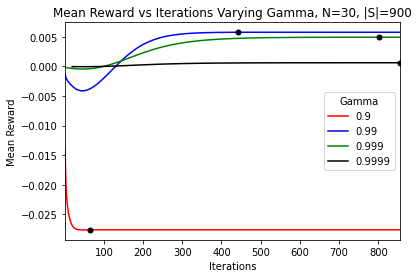

In [163]:
# VI frozen lake big
gammas = [0.9,0.99,.999,.9999]
results = {}

for gamma in gammas:
    vi_df, vi = run_value_iteration(big_lake["P"], big_lake["R"],  gamma=gamma)
    results[gamma] = vi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    coef = (1-gamma)/gamma
    df = results[gamma]
    final_mean = coef*df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([coef*df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, N=30, |S|=900")
plt.xlim(left=1, right=max_iter)

(1.0, 24.0)

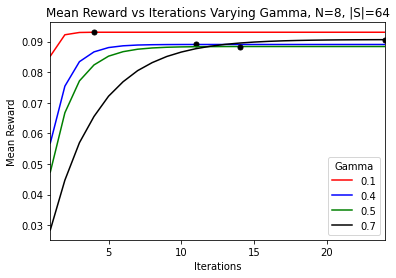

In [171]:
# VI frozen lake small
gammas = [0.1,0.4, 0.5, 0.7]
results = {}

for gamma in gammas:
    vi_df, vi = run_value_iteration(small_lake["P"], small_lake["R"],  gamma=gamma)
    results[gamma] = vi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]

    coef = (1-gamma)
    df['Mean V'] = coef*df['Mean V']
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, N=8, |S|=64")
plt.xlim(left=1, right=max_iter)

(1.0, 60.0)

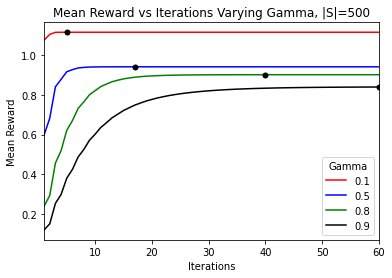

In [183]:
# VI forest large
gammas = [0.1,0.5,0.8, 0.9]
results = {}
for gamma in gammas:
    P, R= example.forest(S=500, p=0.15, r1=100, r2=10)
    vi_df, vi = run_value_iteration(P, R,  gamma=gamma)
    results[gamma] = vi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]
    coef = (1-gamma)
    df['Mean V'] *= coef
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, |S|=500")
plt.xlim(left=1, right=max_iter)

(1.0, 60.0)

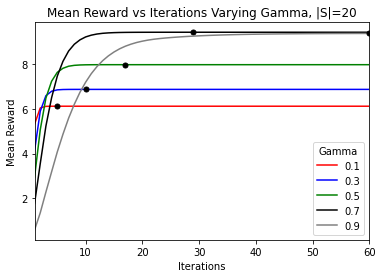

In [182]:
# VI forest small
gammas = [0.1, 0.3, 0.5, 0.7, 0.9]
results = {}
for gamma in gammas:
    P, R= example.forest(S=20, p=0.15, r1=100, r2=10)
    vi_df, vi = run_value_iteration(P, R,  gamma=gamma)
    results[gamma] = vi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]
    coef = (1-gamma)
    df['Mean V'] *= coef
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, |S|=20")
plt.xlim(left=1, right=max_iter)

(1.0, 13.0)

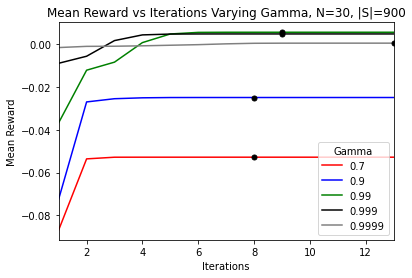

In [190]:
# PI frozen lake big
gammas = [0.7,0.9, 0.99, 0.999]
results = {}
for gamma in gammas:
    pi_df, pi = run_policy_iteration(big_lake["P"], big_lake["R"],  gamma=gamma)
    results[gamma] = pi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]
    coef = (1-gamma)
    df['Mean V'] *= coef
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, N=30, |S|=900")
plt.xlim(left=1, right=max_iter)

(1.0, 7.0)

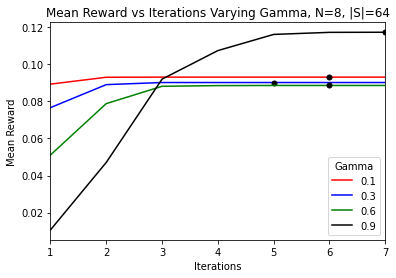

In [200]:
# PI frozen lake small
gammas = [0.1,0.3,0.6,0.9]
results = {}
for gamma in gammas:
    pi_df, pi = run_policy_iteration(small_lake["P"], small_lake["R"],  gamma=gamma)
    results[gamma] = pi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]
    coef = (1-gamma)
    df['Mean V'] *= coef
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, N=8, |S|=64")
plt.xlim(left=1, right=max_iter)

(1.0, 20.0)

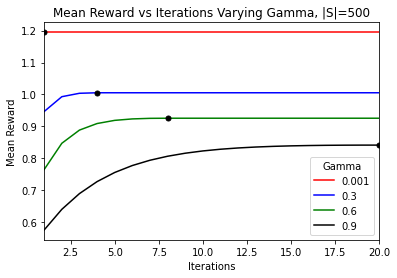

In [214]:
# PI forest large
gammas = [0.001,0.3,0.6,0.9]
results = {}
for gamma in gammas:
    P, R= example.forest(S=500, p=0.15, r1=100, r2=10)
    pi_df, pi = run_policy_iteration(P, R,  gamma=gamma)
    results[gamma] = pi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]
    coef = (1-gamma)
    df['Mean V'] *= coef
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, |S|=500")
plt.xlim(left=1, right=max_iter)

(1.0, 19.0)

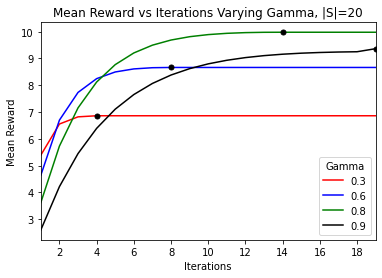

In [218]:
# PI forest small
gammas = [0.3, 0.6, 0.8, 0.9]
results = {}
for gamma in gammas:
    P, R= example.forest(S=20, p=0.15, r1=100, r2=10)
    pi_df, pi = run_policy_iteration(P, R,  gamma=gamma)
    results[gamma] = pi_df

max_iter = max([df.Iteration[df.shape[0] - 1] for gamma, df in results.items()])
for i, gamma in enumerate(gammas):
    df = results[gamma]
    coef = (1-gamma)
    df['Mean V'] *= coef
    final_mean = df['Mean V'][df.shape[0] - 1]
    plt.plot(pd.concat([df.Iteration, pd.Series([max_iter])]), pd.concat([df['Mean V'], pd.Series([final_mean])]), label=gamma, color=colors[i])
    plt.plot([df.Iteration[df.shape[0]-1]], [final_mean], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")
plt.legend(title="Gamma")
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Iterations Varying Gamma, |S|=20")
plt.xlim(left=1, right=max_iter)

0.99
0.0 | 0.9998200152991848 | 0.8998380137692664 | 0.99
-2.991962252800601e-05 | 0.9952214299191838 | 0.8956992869272644 | 0.99
-0.00019299659568017865 | 0.9889019866090117 | 0.8900117879481111 | 0.99
-0.0004953467722356653 | 0.9839304345736807 | 0.8855373911163139 | 0.99
0.0024477672968724715 | 0.9784749344245016 | 0.8806274409820527 | 0.99
0.0022897120037830327 | 0.9725632771765658 | 0.8753069494589094 | 0.99
0.0017656324477274795 | 0.9666970033898967 | 0.8700273030509078 | 0.99
0.001323861922328665 | 0.9619044147679621 | 0.8657139732911691 | 0.99
0.0007909531205898163 | 0.9572313051603843 | 0.8615081746443511 | 0.99
0.00031730015080451613 | 0.9524380212507568 | 0.8571942191256862 | 0.99
-0.00015109407567820865 | 0.9482375141535598 | 0.8534137627382086 | 0.99
0.002598990063029644 | 0.9424048717334683 | 0.8481643845601262 | 0.99
-0.0010894885824015443 | 0.9371046424522077 | 0.843394178206993 | 0.99
-0.005077546182443335 | 0.9328411521109459 | 0.8395570368998573 | 0.99
-0.00897188146

(1.0, 20001.0)

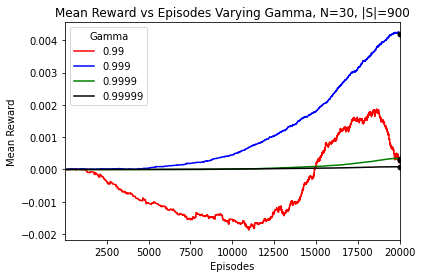

In [235]:
# q learning frozen lake large
gammas = [0.99, 0.999, 0.9999, 0.99999]
results = {}
rewards = {}
alpha = 0.9
for gamma in gammas:
    print(gamma)
    ql_df, ql, mean_rewards = run_qlearning(big_lake["P"], big_lake["R"],  gamma=gamma, alpha=alpha, terminating_rewards=[0,3.33,3.34,-3.33,-3.34],
                epsilon_decay=0.99999, epsilon_min=0.01, alpha_decay=0.99999, alpha_min=0.6, n_ep=20000)
    results[gamma] = ql_df
    rewards[gamma] = mean_rewards

max_iter = max([len(reward) for gamma, reward in rewards.items()])
for i, gamma in enumerate(gammas):
    coef = (1-gamma)
    reward = list(coef*np.array(rewards[gamma]))
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=gamma, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Gamma, N=30, |S|=900")
plt.xlim(left=1, right=max_iter)



(1.0, 20001.0)

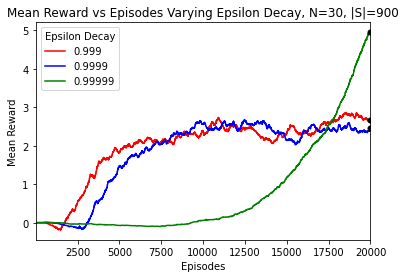

In [130]:
#q learning frozen lake large
epsilon_decays = [0.999, 0.9999, 0.99999]
results = {}
rewards = {}
alpha = 0.9
gamma = 0.99
for decay in epsilon_decays:
    print(decay)
    ql_df, ql, mean_rewards = run_qlearning(big_lake["P"], big_lake["R"],  gamma=gamma, alpha=alpha, terminating_rewards=[0,3.33,3.34,-3.33,-3.34],
                epsilon_decay=decay, epsilon_min=0.01, alpha_decay=0.99999, alpha_min=0.6, n_ep=20000)
    results[decay] = ql_df
    rewards[decay] = mean_rewards

max_iter = max([len(reward) for decay, reward in rewards.items()])
for i, decay in enumerate(epsilon_decays):
    reward = rewards[decay]
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=decay, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Epsilon Decay, N=30, |S|=900")
plt.xlim(left=1, right=max_iter)



0.01
0.0 | 0.9999400014999804 | 0.8999460013499823 | 0.9999
-2.9919440423170792e-05 | 0.9948731616278758 | 0.8953858454650873 | 0.9999
-0.00020556113121373976 | 0.9898517930993626 | 0.8908666137894267 | 0.9999
-0.00048345186264338124 | 0.984540663645729 | 0.8860865972811571 | 0.9999
-0.0008432633280651492 | 0.9783770913340794 | 0.8805393822006726 | 0.9999
-0.0010826664299415402 | 0.9740232240785058 | 0.8766209016706557 | 0.9999
-0.0014911982594119396 | 0.9696693382514939 | 0.8727024044263451 | 0.9999
-0.00842623458726215 | 0.965373528665064 | 0.8688361757985585 | 0.9999
-0.01259828940172255 | 0.9594450764656147 | 0.8635005688190573 | 0.9999
-0.01344146184993726 | 0.9549366931907138 | 0.8594430238716477 | 0.9999
-0.017212613597990468 | 0.9495185056773567 | 0.8545666551096258 | 0.9999
-0.0177392973402948 | 0.9448961200519523 | 0.8504065080467617 | 0.9999
-0.021385577566662387 | 0.940409079713461 | 0.8463681717421199 | 0.9999
-0.021894362583152506 | 0.9351761842403863 | 0.8416585658163533

(1.0, 20001.0)

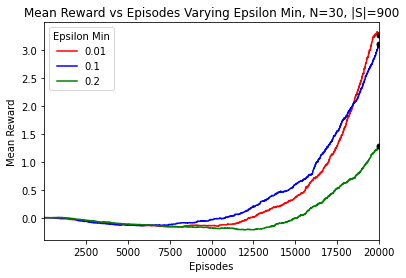

In [131]:
# q learning frozen lake large
epsilon_mins = [0.01, 0.1, 0.2]
results = {}
rewards = {}
alpha = 0.9
gamma = 0.9999
for eps_min in epsilon_mins:
    print(eps_min)
    ql_df, ql, mean_rewards = run_qlearning(big_lake["P"], big_lake["R"],  gamma=gamma, alpha=alpha, terminating_rewards=[0,3.33,3.34,-3.33,-3.34],
                epsilon_decay=0.99999, epsilon_min=eps_min, alpha_decay=0.99999, alpha_min=0.6, n_ep=20000)
    results[eps_min] = ql_df
    rewards[eps_min] = mean_rewards

max_iter = max([len(reward) for eps_min, reward in rewards.items()])
for i, eps_min in enumerate(epsilon_mins):
    reward = rewards[eps_min]
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=eps_min, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Epsilon Min")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Epsilon Min, N=30, |S|=900")
plt.xlim(left=1, right=max_iter)



In [19]:
np.unique(np.array(ql.policy) == np.array(pi.policy), return_counts=True)

(array([False,  True]), array([31, 33]))

0.7
0.04678120321874999 | 0.9999700002999992 | 0.8999973000026998 | 0.7
0.5986734437056755 | 0.9653252609539948 | 0.8968294960592726 | 0.7
0.8583277023308491 | 0.9391028126272649 | 0.8943630242843671 | 0.7
0.6862571193542457 | 0.9067663320441502 | 0.8912346587802059 | 0.7
0.7997796673524844 | 0.8777085814731076 | 0.888336628052373 | 0.7
0.6891972808664159 | 0.8481050053820139 | 0.8852939662312533 | 0.7
0.5908104591669803 | 0.82472856120582 | 0.8828230231116921 | 0.7
0.6668962317194147 | 0.7983556325307614 | 0.8799585042188102 | 0.7
0.5123041436531245 | 0.7720072839700964 | 0.877010311838347 | 0.7
0.5222243512468362 | 0.7454021041020807 | 0.8739400220394627 | 0.7
0.5667447739726598 | 0.7242913048101037 | 0.8714327944594569 | 0.7
0.3731699601965895 | 0.6989529909565191 | 0.8683351393777187 | 0.7
0.5178924564028875 | 0.6755879292891075 | 0.8653878117263518 | 0.7
0.5142495967478691 | 0.6477618464047977 | 0.8617556326013085 | 0.7
0.5552038402649697 | 0.629246431409643 | 0.8592601602028466 |

(1.0, 1501.0)

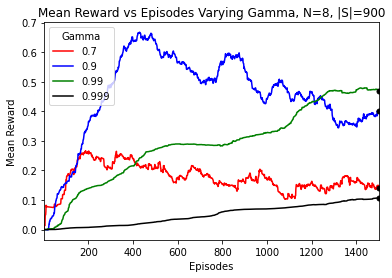

In [238]:
# q learning frozen lake small
gammas = [0.7, 0.9, 0.99, 0.999]
results = {}
rewards = {}
alpha = 0.9
for gamma in gammas:
    print(gamma)
    ql_df, ql, mean_rewards = run_qlearning(small_lake["P"], small_lake["R"],  gamma=gamma, alpha=alpha, terminating_rewards=[0,3.33,3.34,-3.33,-3.34],
                epsilon_decay=0.99999, epsilon_min=0.01, alpha_decay=0.999999, alpha_min=0.3, n_ep=1500)
    results[gamma] = ql_df
    rewards[gamma] = mean_rewards

max_iter = max([len(reward) for gamma, reward in rewards.items()])
for i, gamma in enumerate(gammas):
    coef = (1-gamma)
    reward = list(coef*np.array(rewards[gamma]))
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=gamma, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Gamma, N=8, |S|=900")
plt.xlim(left=1, right=max_iter)



0.1
0.012305055579216911 | 0.13532174948275888 | 0.7368569409086358 | 0.1
0.3
0.015735010484231 | 0.13532174948275888 | 0.7368569409086358 | 0.3
0.5
0.02221666120747114 | 0.13532174948275888 | 0.7368569409086358 | 0.5
0.7
0.033139811262944935 | 0.13532174948275888 | 0.7368569409086358 | 0.7


(1.0, 6.0)

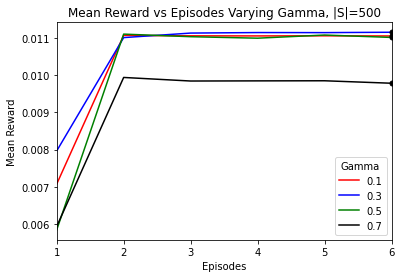

In [226]:
# q learning forest large
gammas = [0.1, 0.3, 0.5, 0.7]
results = {}
rewards = {}
alpha = 0.9
for gamma in gammas:
    print(gamma)
    P, R = example.forest(S=500, p=.15, r1=100, r2=10)
    ql_df, ql, mean_rewards = run_qlearning(P,R,  gamma=gamma, alpha=alpha,
                epsilon_decay=0.9999, epsilon_min=0.05, alpha_decay=0.99999, alpha_min=0.6, n_ep=5, n_iter=10000, starting_state=0)
    results[gamma] = ql_df
    rewards[gamma] = mean_rewards

max_iter = max([len(reward) for gamma, reward in rewards.items()])
for i, gamma in enumerate(gammas):
    coef = (1-gamma)
    reward = list(coef*np.array(rewards[gamma]))
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=gamma, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Gamma, |S|=500")
plt.xlim(left=1, right=max_iter)



0.01
0.019650454419584643 | 0.13532174948275888 | 0.7368569409086358 | 0.3
0.05
0.016121187515741667 | 0.13532174948275888 | 0.7368569409086358 | 0.3
0.15
0.01787262662960136 | 0.15 | 0.7368569409086358 | 0.3


(1.0, 6.0)

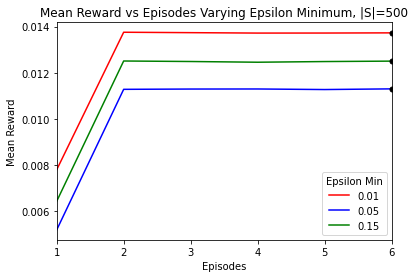

In [230]:
# q learning forest large
gamma = 0.3
e_ms = [0.01, 0.05, 0.15]
results = {}
rewards = {}
alpha = 0.9
for ed in e_ms:
    print(ed)
    P, R = example.forest(S=500, p=.15, r1=100, r2=10)
    ql_df, ql, mean_rewards = run_qlearning(P,R,  gamma=gamma, alpha=alpha,
                epsilon_decay=.9999, epsilon_min=ed, alpha_decay=0.99999, alpha_min=0.6, n_ep=5, n_iter=10000, starting_state=0)
    results[ed] = ql_df
    rewards[ed] = mean_rewards

max_iter = max([len(reward) for ed, reward in rewards.items()])
for i, ed in enumerate(e_ms):
    coef = (1-gamma)
    reward = list(coef*np.array(rewards[ed]))
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=ed, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Epsilon Min")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Epsilon Minimum, |S|=500")
plt.xlim(left=1, right=max_iter)



0.999
0.011371154360947718 | 0.05 | 0.7368569409086358 | 0.3
0.9999
0.017668152984635907 | 0.13532174948275888 | 0.7368569409086358 | 0.3
0.99999
0.01995033950645984 | 0.8187299343429234 | 0.7368569409086358 | 0.3


(1.0, 6.0)

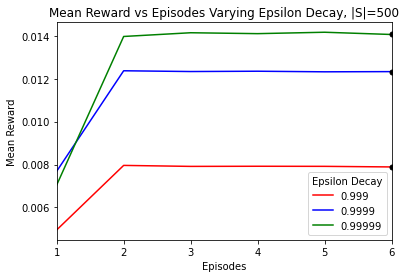

In [231]:
# q learning forest large
gamma = 0.3
e_ds = [0.999, 0.9999, 0.99999]
results = {}
rewards = {}
alpha = 0.9
for ed in e_ds:
    print(ed)
    P, R = example.forest(S=500, p=.15, r1=100, r2=10)
    ql_df, ql, mean_rewards = run_qlearning(P,R,  gamma=gamma, alpha=alpha,
                epsilon_decay=ed, epsilon_min=0.05, alpha_decay=0.99999, alpha_min=0.6, n_ep=5, n_iter=10000, starting_state=0)
    results[ed] = ql_df
    rewards[ed] = mean_rewards

max_iter = max([len(reward) for ed, reward in rewards.items()])
for i, ed in enumerate(e_ds):
    coef = (1-gamma)
    reward = list(coef*np.array(rewards[ed]))
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=ed, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Epsilon Decay")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Epsilon Decay, |S|=500")
plt.xlim(left=1, right=max_iter)



0.2
0.3236296383375104 | 0.13532174948275888 | 0.7368569409086358 | 0.2
0.4
0.43239127864544274 | 0.13532174948275888 | 0.7368569409086358 | 0.4
0.6
0.6223947984355123 | 0.13532174948275888 | 0.7368569409086358 | 0.6
0.8
1.0709994147596582 | 0.13532174948275888 | 0.7368569409086358 | 0.8


(1.0, 11.0)

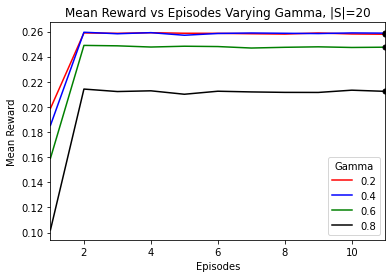

In [233]:
# q learning forest small
gammas = [0.2,0.4, 0.6,0.8]
results = {}
rewards = {}
alpha = 0.9
for gamma in gammas:
    print(gamma)
    P, R = example.forest(S=20, p=.15, r1=100, r2=10)
    ql_df, ql, mean_rewards = run_qlearning(P,R,  gamma=gamma, alpha=alpha,
                epsilon_decay=0.9999, epsilon_min=0.05, alpha_decay=0.99999, alpha_min=0.6, n_ep=10, n_iter=10000, starting_state=0)
    results[gamma] = ql_df
    rewards[gamma] = mean_rewards

max_iter = max([len(reward) for gamma, reward in rewards.items()])
for i, gamma in enumerate(gammas):
    coef = (1-gamma)
    reward = list(coef*np.array(rewards[gamma]))
    final_reward = reward[-1]
    plt.plot(list(range(1, len(reward)+1))+[max_iter], reward + [final_reward], label=gamma, color=colors[i])
    plt.plot([len(reward)], [final_reward], marker="o", markersize=5, markeredgecolor="black",markerfacecolor="black")

plt.legend(title="Gamma")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.title("Mean Reward vs Episodes Varying Gamma, |S|=20")
plt.xlim(left=1, right=max_iter)



In [241]:
# timing and final comparisons
final_results = {}

In [246]:
df, model = run_policy_iteration(big_lake["P"],big_lake["R"], gamma=0.999)
final_results["pi_big_lake"] = model
print(model.time, model.iter)

6.74114203453064 9


In [262]:
df, model = run_policy_iteration(small_lake["P"],small_lake["R"], gamma=0.9)
final_results["pi_small_lake"] = model
print(model.time, model.iter)

0.006925821304321289 7


In [248]:
df, model = run_value_iteration(big_lake["P"],big_lake["R"], gamma=0.99)
final_results["vi_big_lake"] = model
print(model.time, model.iter)

0.7291741371154785 441


In [249]:
df, model = run_value_iteration(small_lake["P"],small_lake["R"], gamma=0.9)
final_results["vi_small_lake"] = model
print(model.time, model.iter)

0.004508495330810547 66


In [270]:
print("Policy Iteration")
print_lake_policy(small_lake["map"], final_results["pi_small_lake"].policy)

Policy Iteration
v > > > > > > < 
v v > > v v v v 
v v v v v v v v 
v v v > v v v v 
v v > ^ > v v ^ 
v v < H > v < H 
v v v v > v v v 
v > > > > > > G 


In [271]:
print("Value Iteration")
print_lake_policy(small_lake["map"], final_results["vi_small_lake"].policy)

Value Iteration
v > > > > > > < 
v v > > v v v v 
v v v v v v v v 
v v v > v v v v 
v v > ^ > v v ^ 
v v < H > v < H 
v v v v > v v v 
v > > > > > > G 


In [284]:
P, R = example.forest(S=500, r1=100, r2=10, p=.15)
df, model = run_policy_iteration(P, R, gamma=0.001)
final_results["pi_big_forest"] = model
print(model.time, model.iter)
print(model.policy)

0.0011348724365234375 1
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [280]:
P, R = example.forest(S=500, r1=100, r2=10, p=.15)
df, model = run_value_iteration(P, R, gamma=0.1)
final_results["vi_big_forest"] = model
print(model.time, model.iter)
print(model.policy)

0.0529172420501709 5
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [281]:
P, R = example.forest(S=20, r1=100, r2=10, p=.15)
df, model = run_policy_iteration(P, R, gamma=0.8)
final_results["pi_small_forest"] = model
print(model.time, model.iter)
print(model.policy)

0.013110876083374023 14
(0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [283]:
P, R = example.forest(S=20, r1=100, r2=10, p=.15)
df, model = run_value_iteration(P, R, gamma=0.8)
final_results["vi_small_forest"] = model
print(model.time, model.iter)
print(model.policy)

0.002403736114501953 40
(0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [288]:
df, model, rewards = run_qlearning(big_lake["P"],big_lake["R"], gamma=.999, alpha=0.9,epsilon_decay=0.99999, epsilon_min=0.01, alpha_min=0.6, alpha_decay=.99999, n_ep=20000, terminating_rewards=[0,3.33,3.34,-3.33,-3.34])
final_results["ql_big_lake"]=model
print(model.time)

0.0 | 0.9998800065997806 | 0.8998920059398025 | 0.999
-5.0843852322615854e-05 | 0.9948831104589803 | 0.8953947994130813 | 0.999
-0.0003001123022672349 | 0.9886943379574512 | 0.8898249041617068 | 0.999
-0.0004616005686303536 | 0.9838418843766362 | 0.8854576959389739 | 0.999
-0.0006704533743193844 | 0.9800025541939262 | 0.8820022987745344 | 0.999
-0.0010795960515302093 | 0.9747345241815364 | 0.8772610717633825 | 0.999
-0.0014353483090757723 | 0.970396866681886 | 0.8733571800136976 | 0.999
-0.0017944568895490634 | 0.9662427602825783 | 0.8696184842543214 | 0.999
-0.002392752811340707 | 0.9610102550401457 | 0.8649092295361351 | 0.999
-0.006139456883936979 | 0.9560546285760995 | 0.8604491657184951 | 0.999
-0.00989822832769352 | 0.9513243148426528 | 0.8561918833583927 | 0.999
-0.010625309192849283 | 0.9442915769868175 | 0.8498624192881401 | 0.999
-0.008008653009240115 | 0.9399859887147479 | 0.8459873898432783 | 0.999
-0.01180924870544698 | 0.9353538854849826 | 0.8418184969364899 | 0.999
-0.01

In [295]:
df, model, rewards = run_qlearning(small_lake["P"],small_lake["R"], gamma=.99, alpha=0.9,epsilon_decay=0.99999, epsilon_min=0.01, alpha_min=0.6, alpha_decay=.99999, n_ep=1500, terminating_rewards=[0,3.33,3.34,-3.33,-3.34])
final_results["ql_small_lake"]=model
print(model.time)

-0.0011523269238773255 | 0.9984911319377396 | 0.8986420187439661 | 0.99
3.50081900617178 | 0.9678093499822322 | 0.8710284149840095 | 0.99
8.568602798871229 | 0.9316478733311874 | 0.8384830859980754 | 0.99
9.735724263317927 | 0.9012698913747765 | 0.8111429022373068 | 0.99
10.539307513444374 | 0.873601745749475 | 0.7862415711745339 | 0.99
11.216814911897679 | 0.8425511919821529 | 0.7582960727839445 | 0.99
12.193061754061107 | 0.815844898333917 | 0.7342604085005312 | 0.99
13.946619857936183 | 0.7929452034844184 | 0.7136506831359855 | 0.99
14.603056852791259 | 0.764952652132938 | 0.6884573869196513 | 0.99
16.017605860824528 | 0.7403579429014704 | 0.6663221486113303 | 0.99
17.443934753470593 | 0.7165969959486495 | 0.6449372963537949 | 0.99
18.63243257994201 | 0.697082295438943 | 0.6273740658950591 | 0.99
19.639255414583552 | 0.675088176653949 | 0.607579358988568 | 0.99
20.528391378554648 | 0.6560212430841468 | 0.6 | 0.99
20.26898567919293 | 0.6366709890728236 | 0.6 | 0.99
0.00494384765625


In [374]:
P, R = example.forest(S=500, r1=100, r2=10, p=.15)

df, model, rewards = run_qlearning(P,R, gamma=.1, alpha=0.9,epsilon_decay=0.99999, epsilon_min=0.01, alpha_min=0.6, alpha_decay=.99999, n_ep=5)
final_results["ql_big_forest"]=model
print(model.time)

0.021824134718970153 | 0.13533392988275578 | 0.6 | 0.1
5.804348945617676


In [375]:
P, R = example.forest(S=20, r1=100, r2=10, p=.15)

df, model, rewards = run_qlearning(P,R, gamma=.4, alpha=0.9,epsilon_decay=0.99999, epsilon_min=0.01, alpha_min=0.6, alpha_decay=.99999, n_ep=5)
final_results["ql_small_forest"]=model
print(model.time)

3.4975552249046347 | 0.13533392988275578 | 0.6 | 0.4
3.6885178089141846


In [370]:
print("Q-Learning")
print_lake_policy(small_lake["map"],final_results["ql_small_lake"].policy)

Q-Learning
> v > > v v v < 
v v ^ > v v ^ ^ 
> v ^ > > > v v 
v > > ^ < ^ < v 
^ > v ^ v v < ^ 
v v < H > > < H 
< > v v v < < v 
> v ^ ^ > v v G 


In [352]:
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

def run_frozen_lake(map, policy):
    small_env = FrozenLakeEnv(desc=map, is_slippery=True)
    small_env.reset()
    i = 0
    while True:
        s, r, d, p = small_env.step(policy[small_env.s])
        i+=1
        if r == 1:
            return 1, i
        elif map[s//len(map)][s%len(map)] == "H":
            return -1, i

In [362]:
successes = []
lengths = []
for i in range(5000):
    success, length = run_frozen_lake(small_lake["map"],final_results["ql_small_lake"].policy)
    successes.append(success)
    lengths.append(length)

np.unique(successes, return_counts=True), np.mean(lengths)

((array([1]), array([5000])), 123.7712)

In [319]:
successes = []
lengths = []
for i in range(5000):
    success, length = run_frozen_lake(small_lake["map"],final_results["pi_small_lake"].policy)
    successes.append(success)
    lengths.append(length)

np.unique(successes, return_counts=True), np.mean(lengths)

((array([1]), array([5000])), 50.2682)

In [360]:
successes = []
lengths = []
for i in range(5000):
    success, length = run_frozen_lake(big_lake["map"],final_results["ql_big_lake"].policy)
    successes.append(success)
    lengths.append(length)

np.unique(successes, return_counts=True), np.mean(lengths)

((array([-1]), array([5000])), 564.6936)

In [361]:
successes = []
lengths = []
for i in range(5000):
    success, length = run_frozen_lake(big_lake["map"],final_results["pi_big_lake"].policy)
    successes.append(success)
    lengths.append(length)

np.unique(successes, return_counts=True), np.mean(lengths)

((array([-1,  1]), array([3775, 1225])), 103.1802)

In [369]:
np.unique(np.array(final_results["pi_small_lake"].policy) == np.array(final_results["ql_small_lake"].policy), return_counts=True)[1][1]/(8*8)

0.4375

In [366]:
np.unique(np.array(final_results["pi_big_lake"].policy) == np.array(final_results["ql_big_lake"].policy), return_counts=True)[1][1]/(30*30)

0.7044444444444444

In [378]:
from random import random
def run_forest_management(s_max, p, r1, r2, timesteps, policy):
    s = 0
    r = 0
    num_cuts = 0
    for i in range(timesteps):
        next_action = policy[s]

        if next_action == 1:
            num_cuts += 1
            if s == s_max:
                r += r2
                s = 0
            else:
                r += 1
                s = 0
        else:
            fire = random() <= p
            if fire:
                s = 0
            elif s == s_max:
                r += r1
            else:
                s += 1
    return r, num_cuts


In [379]:
run_forest_management(20, 0.15, 100, 10, 10000, final_results["ql_small_forest"].policy)

(4594, 4594)

In [380]:
run_forest_management(20, 0.15, 100, 10, 10000, final_results["pi_small_forest"].policy)

(4577, 4577)

In [382]:
run_forest_management(20, 0.15, 100, 10, 10000, final_results["ql_big_forest"].policy)

(4585, 4585)

In [383]:
run_forest_management(20, 0.15, 100, 10, 10000, final_results["pi_big_forest"].policy)

(4598, 4598)

In [385]:
np.array(final_results["ql_big_forest"].policy)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [386]:
np.array(final_results["pi_big_forest"].policy)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [387]:
np.array(final_results["ql_small_forest"].policy)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [388]:
np.array(final_results["pi_small_forest"].policy)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [390]:
print("Q-Learning 30x30 Grid Policy")
print_lake_policy(big_lake["map"], final_results["ql_big_lake"].policy)

Q-Learning 30x30 Grid Policy
^ < ^ H > > > > ^ < H > H > > > < H > > > ^ ^ > > < H > H > 
H < H H > > > v v < v v v > ^ v v v > > v < H > > < v v v > 
v v < v ^ > < v ^ < v v H > ^ v > > v v > v v v > < < < H > 
^ ^ < v H > > < H > v ^ v > ^ v ^ > > > < ^ > v v < < ^ v < 
> H > H > > > v v v > > < < H > ^ ^ > > < H > > > v < H > v 
H > v v v > < v v > ^ > > < v v ^ ^ ^ ^ v v > v > > v v v ^ 
v v ^ ^ > > ^ v v < H > ^ ^ ^ < H < H > ^ ^ ^ > v ^ < < < H 
^ < H H > < H > > v v < H < H > ^ > v < H v ^ > < H > v v v 
H > v v v v v v ^ v < < v ^ v ^ H > ^ < H > H > > v < > v v 
v v v v > < < < H > ^ < < H > v v < H > v v v ^ ^ > ^ ^ v v 
> v < ^ > v > < H > v > v v v < ^ v v v v v < ^ H > > ^ < v 
> v < H > v v v v ^ ^ > v ^ > > > > < ^ ^ ^ < H > > ^ ^ < > 
^ v > v > > > > < H > ^ < H > v ^ v < H H > > v v > < H > > 
H > v > > ^ ^ > > v v v v v v ^ v v < v ^ ^ > ^ > < v v < > 
v > > < < H H > v > v < > > < H > v < < H H > < v ^ > > v < 
> ^ ^ > > v v < ^ > > v ^ v < ^ > > > < < v > > > ^ ^ ^ 

In [391]:
print("PI/VI 30x30 Grid Policy")
print_lake_policy(big_lake["map"], final_results["pi_big_lake"].policy)

PI/VI 30x30 Grid Policy
^ < < H > > > < < < H < H > > > < H > > > > ^ > > < H < H > 
H < H H > > v v v < v v v > > > v v > > > < H > v < v v v > 
v v v v ^ > v v ^ < v < H > > > > > > > > > v v v < < < H > 
^ ^ < < H > v < H > v v v ^ ^ > > > > > > ^ > v v < < ^ v > 
< H < H v > v v v v v v ^ < H > > > > > < H > > v v < H > v 
H v v v v > > v v < ^ < ^ ^ v ^ ^ ^ ^ ^ ^ v > > v v v v v ^ 
v v ^ ^ > > ^ > v < H > ^ ^ ^ < H < H > ^ ^ ^ > > ^ > v < H 
^ < H H > < H > v v v < H < H > v > v < H > ^ > < H > v v v 
H > v v v v v v ^ > v < v ^ v < H > ^ < H < H > > v > v v v 
v v v v > v v < H > v < < H > v v < H > v v v ^ ^ > > v v v 
v > > ^ > v v < H > v v v v v v v v v v v v < < H > v v v v 
v > < H > > v v v ^ > v v ^ > v v v < ^ ^ ^ < H v > v ^ > v 
^ > v v > > > > < H > v < H > v v v < H H > > v v > < H > v 
H > > > > ^ ^ > v v v v v v v ^ > v < v v ^ > > v v v v v v 
v > > > < H H > > > v v v v < H > v < < H H > > > > > v v v 
^ ^ ^ > > v v > ^ > v v ^ > < v > v < < v v > > > ^ > v v v 
